In [1]:
# IMPORT PACKAGES
import torch
import lightning
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)

In [3]:
from mlcolvar.utils.io import create_dataset_from_files
from mlcolvar.data import DictModule

filenames = [ "stateA_full/COLVAR_d", "stateB/COLVAR_d"]

n_states = len(filenames)

# load dataset
# here we only load part of the data to speed up the training, 
#change stop to 25000 and stride to 1 to use them all for better results
dataset, df = create_dataset_from_files(filenames,
                                        create_labels=True,
                                        return_dataframe=True,
                                        filter_args={'regex':'d' }, # select distances between heavy atoms
                                        stop=10000,
                                        stride=1)

datamodule = DictModule(dataset,lengths=[0.8,0.2])

Class 0 dataframe shape:  (5001, 50)
Class 1 dataframe shape:  (5001, 50)

 - Loaded dataframe (10002, 50): ['time', 'phi', 'psi', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35', 'd36', 'd37', 'd38', 'd39', 'd40', 'd41', 'd42', 'd43', 'd44', 'd45', 'walker', 'labels']
 - Descriptors (10002, 45): ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35', 'd36', 'd37', 'd38', 'd39', 'd40', 'd41', 'd42', 'd43', 'd44', 'd45']


In [4]:
from mlcolvar.cvs import DeepTDA

n_cvs = 1
target_centers = [-5,5]
target_sigmas = [0.2, 0.2]
nn_layers = [45,30,15,1]
# MODEL
model = DeepTDA(n_states=n_states, 
                n_cvs=1,
                target_centers=target_centers, 
                target_sigmas=target_sigmas, 
                layers=nn_layers)

In [5]:
from lightning import Trainer
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from mlcolvar.utils.trainer import MetricsCallback

# define callbacks
metrics = MetricsCallback()
early_stopping = EarlyStopping(monitor="valid_loss", patience=20, min_delta=1e-5)

# define trainer
# for better results we can also increase the number of epochs or use a early_stopping
trainer = lightning.Trainer(callbacks=[metrics, early_stopping],
                     max_epochs=2000, logger=None, enable_checkpointing=False)

# fit
torch.set_float32_matmul_precision('medium')
trainer.fit( model, datamodule )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/dhiman/miniconda3/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Missing logger folder: /home/dhiman/lasso_reg_cv/ala2/deepTDA_distance/2fs_new/training/lightning_logs

  | Name    | Type          | Params | In sizes | Out sizes
-----------------------------------------------------------------
0 | loss_fn | TDALoss       | 0      | ?        | ?        
1 | norm_in | Normalization

/home/dhiman/miniconda3/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 69.60it/s, v_num=0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 1/1 [00:00<00:00, 166.26it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 187.38it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 182.23it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 171.13it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 144.00it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 151.42it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 163.97it/s, v_num=0]       
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 150.85it/s, v_num=0]

Epoch 26: 100%|██████████| 1/1 [00:00<00:00, 173.73it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 27: 100%|██████████| 1/1 [00:00<00:00, 162.31it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28: 100%|██████████| 1/1 [00:00<00:00, 142.49it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 29: 100%|██████████| 1/1 [00:00<00:00, 179.04it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 30: 100%|██████████| 1/1 [00:00<00:00, 156.76it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 31: 100%|██████████| 1/1 [00:00<00:00, 196.73it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 32: 100%|██████████| 1/1 [00:00<00:00, 191.29it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 33: 100%|██████████| 1/1 [00:00<00:00, 172.61it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34: 100%|██████████| 1/1 [00:00<00:00, 201.65it/s,

Epoch 52: 100%|██████████| 1/1 [00:00<00:00, 187.89it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 53: 100%|██████████| 1/1 [00:00<00:00, 201.48it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 54: 100%|██████████| 1/1 [00:00<00:00, 123.98it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 55: 100%|██████████| 1/1 [00:00<00:00, 181.20it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 56: 100%|██████████| 1/1 [00:00<00:00, 166.41it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 57: 100%|██████████| 1/1 [00:00<00:00, 140.07it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 58: 100%|██████████| 1/1 [00:00<00:00, 149.94it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 59: 100%|██████████| 1/1 [00:00<00:00, 178.92it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 60: 100%|██████████| 1/1 [00:00<00:00, 184.49it/s,

Epoch 77: 100%|██████████| 1/1 [00:00<00:00, 157.12it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78: 100%|██████████| 1/1 [00:00<00:00, 174.58it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 79: 100%|██████████| 1/1 [00:00<00:00, 188.23it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 80: 100%|██████████| 1/1 [00:00<00:00, 135.89it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 81: 100%|██████████| 1/1 [00:00<00:00, 147.82it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 82: 100%|██████████| 1/1 [00:00<00:00, 177.85it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 83: 100%|██████████| 1/1 [00:00<00:00, 137.98it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 84: 100%|██████████| 1/1 [00:00<00:00, 173.83it/s, v_num=0]      
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 85: 100%|██████████| 1/1 [00:00<00:00, 180.10it/s,

Epoch 103: 100%|██████████| 1/1 [00:00<00:00, 123.15it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 104: 100%|██████████| 1/1 [00:00<00:00, 144.45it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 105: 100%|██████████| 1/1 [00:00<00:00, 159.48it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 106: 100%|██████████| 1/1 [00:00<00:00, 165.05it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 107: 100%|██████████| 1/1 [00:00<00:00, 130.27it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 108: 100%|██████████| 1/1 [00:00<00:00, 135.58it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 109: 100%|██████████| 1/1 [00:00<00:00, 148.26it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 110: 100%|██████████| 1/1 [00:00<00:00, 180.08it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 111: 100%|██████████| 1/1 [00:00<00:00, 148.61it/s

Epoch 129: 100%|██████████| 1/1 [00:00<00:00, 158.63it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 130: 100%|██████████| 1/1 [00:00<00:00, 142.10it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 131: 100%|██████████| 1/1 [00:00<00:00, 146.38it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 132: 100%|██████████| 1/1 [00:00<00:00, 128.16it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 133: 100%|██████████| 1/1 [00:00<00:00, 173.64it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 134: 100%|██████████| 1/1 [00:00<00:00, 177.97it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 135: 100%|██████████| 1/1 [00:00<00:00, 168.15it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 136: 100%|██████████| 1/1 [00:00<00:00, 144.68it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 137: 100%|██████████| 1/1 [00:00<00:00, 129.99it/s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Epoch 184: 100%|██████████| 1/1 [00:00<00:00, 175.28it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 185: 100%|██████████| 1/1 [00:00<00:00, 157.69it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 186: 100%|██████████| 1/1 [00:00<00:00, 190.35it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 187: 100%|██████████| 1/1 [00:00<00:00, 171.40it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 188: 100%|██████████| 1/1 [00:00<00:00, 149.80it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 189: 100%|██████████| 1/1 [00:00<00:00, 183.13it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 190: 100%|██████████| 1/1 [00:00<00:00, 178.23it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 191: 100%|██████████| 1/1 [00:00<00:00, 147.80it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 192: 100%|██████████| 1/1 [00:00<00:00, 138.20it/

Epoch 210: 100%|██████████| 1/1 [00:00<00:00, 159.00it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 211: 100%|██████████| 1/1 [00:00<00:00, 174.03it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 212: 100%|██████████| 1/1 [00:00<00:00, 134.48it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 213: 100%|██████████| 1/1 [00:00<00:00, 167.80it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 214: 100%|██████████| 1/1 [00:00<00:00, 185.54it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 215: 100%|██████████| 1/1 [00:00<00:00, 161.42it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 216: 100%|██████████| 1/1 [00:00<00:00, 174.96it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 217: 100%|██████████| 1/1 [00:00<00:00, 191.35it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 218: 100%|██████████| 1/1 [00:00<00:00, 76.21it/s,

Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 236: 100%|██████████| 1/1 [00:00<00:00, 145.07it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 237: 100%|██████████| 1/1 [00:00<00:00, 136.30it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 238: 100%|██████████| 1/1 [00:00<00:00, 201.65it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 239: 100%|██████████| 1/1 [00:00<00:00, 154.90it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 240: 100%|██████████| 1/1 [00:00<00:00, 173.66it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 241: 100%|██████████| 1/1 [00:00<00:00, 187.06it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 242: 100%|██████████| 1/1 [00:00<00:00, 155.62it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 243: 100%|██████████| 1/1 [00:00<00:00, 141.20it/s, v_num=0]     
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 244:

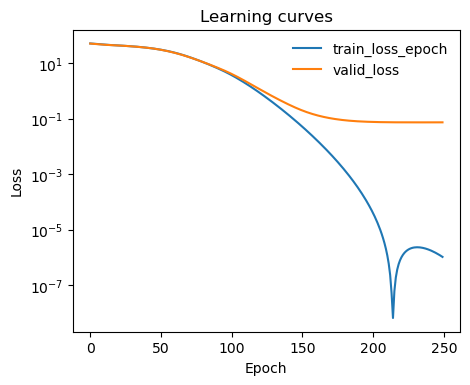

In [6]:
from mlcolvar.utils.plot import plot_metrics

ax = plot_metrics(metrics.metrics,
                  keys=['train_loss_epoch','valid_loss'],
                  #linestyles=['-.','-'], colors=['fessa1','fessa5'],
                  yscale='log')

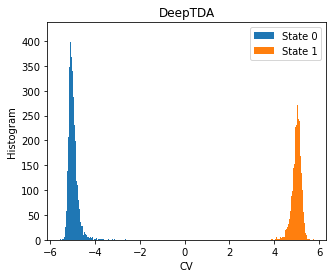

In [7]:
fig,ax = plt.subplots( 1, 1, figsize=(5,4) )

X = dataset[:]['data']
Y = dataset[:]['labels']

with torch.no_grad():
    s = model(torch.Tensor(X)).numpy()

for i in range(n_states):
    s_red = s[torch.nonzero(Y==i, as_tuple=True)]
    ax.hist(s_red[:,0],bins=100, label=f'State {i}')

ax.set_xlabel(f'CV')
ax.set_ylabel('Histogram')
ax.set_title('DeepTDA')
plt.legend()
plt.show()

In [8]:
x = torch.rand(45, dtype=torch.float32, requires_grad=True).unsqueeze(0)
traced_cv = torch.jit.trace ( model, example_inputs=x)
filename='ala2_deepTDA.pt' 
traced_cv.save(filename)

/home/dhiman/miniconda3/lib/python3.9/site-packages/torch/jit/_trace.py:154: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  if a.grad is not None:


In [10]:
#Lasso Regression
from sklearn import linear_model
from sklearn.linear_model import LassoCV

with torch.no_grad():
    s = model(torch.Tensor(X)).numpy()
print(s.shape)
tda = s[:,0]

reg = LassoCV(cv=5, random_state=0, max_iter=10000).fit(X, tda)
print(reg.coef_)

(10002, 1)
[ -0.          -0.          -0.          -0.           0.
   0.           0.           0.           4.2236229   -0.
  -0.           0.          -0.           0.           0.
   0.           0.          -0.         123.90351415 -74.15192286
 -24.54839164 -20.86330968  -3.61561977 -10.31160951 -15.16077923
  36.72521523   0.          22.87184385   0.           8.63366025
   0.          -0.          -1.81039085   0.           0.
  -0.           5.37575896  -1.78651312  -0.68056149  -0.
  -0.          -0.           0.           0.           0.        ]


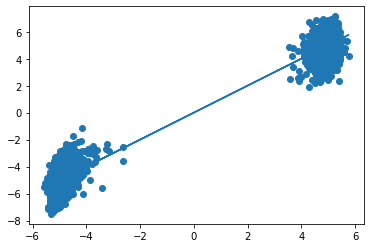

In [12]:
X_np = torch.Tensor(X).numpy()
ypred = reg.predict(X)

plt.scatter(tda,ypred)
plt.plot(tda,tda)


In [14]:
s='lasso: COMBINE ARG='
for i in range(len(reg.coef_)):
    if reg.coef_[i] != 0:
        s+= 'd%d'%(i+1)
        if i < len(reg.coef_) - 1:
            s+= ','
s+= ' COEFFICIENTS='

for i in range(len(reg.coef_)):
    if reg.coef_[i] != 0:
        s+= '%0.4f'%reg.coef_[i]
        if i < len(reg.coef_) - 1:
            s+= ','
s+= ' PERIODIC=NO'
print(s)
print(' ')

#correct for offset
offset = reg.intercept_
if offset>0:
    s2 = 'lassoCV: MATHEVAL ARG=lasso FUNC=x+%0.4f PERIODIC=NO'%offset
elif offset<0:
    s2 = 'lassoCV: MATHEVAL ARG=lasso FUNC=x%0.4f PERIODIC=NO'%offset
print(s2)

lasso: COMBINE ARG=d9,d19,d20,d21,d22,d23,d24,d25,d26,d28,d30,d33,d37,d38,d39, COEFFICIENTS=4.2236,123.9035,-74.1519,-24.5484,-20.8633,-3.6156,-10.3116,-15.1608,36.7252,22.8718,8.6337,-1.8104,5.3758,-1.7865,-0.6806, PERIODIC=NO
 
lassoCV: MATHEVAL ARG=lasso FUNC=x-6.1677 PERIODIC=NO
